In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
y_train = np.load('/content/gdrive/MyDrive/datasets/PlotRecognition/curves12_200_train.npy')

In [8]:
X_train = np.load('/content/gdrive/MyDrive/datasets/PlotRecognition/plots12_200_train.npy')

In [9]:
y_test = np.load('/content/gdrive/MyDrive/datasets/PlotRecognition/curves12_200_test.npy')

In [10]:
X_test = np.load('/content/gdrive/MyDrive/datasets/PlotRecognition/plots12_200_test.npy')

Checking whether the plots were loaded correctly:

In [11]:
X_train.shape

(10000, 201, 201)

In [12]:
dim_x = X_train.shape[1]
dim_y = X_train.shape[2]
print(dim_x, dim_y)

201 201


In [13]:
y_train.shape

(10000, 201)

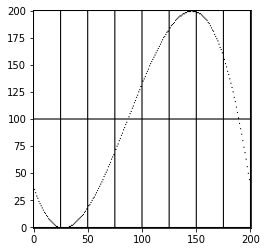

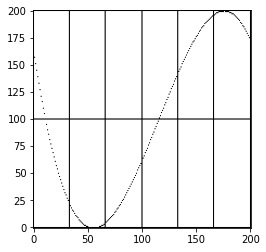

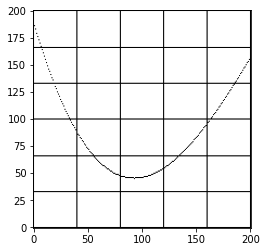

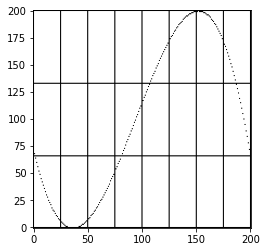

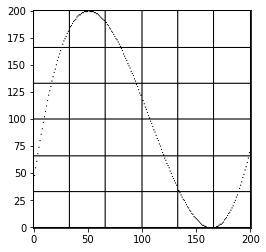

In [14]:
for n in range(5):
    plt.imshow(X_train[n, :, :], cmap='gray_r', vmin=0, vmax=1, origin='lower')
    plt.show()

In [15]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation='relu',
            input_shape=(dim_x, dim_y, 1)
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=(3, 3),
            activation='relu'
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(
            filters=128,
            kernel_size=(3, 3),
            activation='relu'
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(dim_x * 4, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(dim_x, activation='relu')
    ]
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [17]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [18]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=None,
    epochs=30,
    validation_split=0.2,
)

Epoch 1/30
250/250 [==============================] - 26s 58ms/step - loss: 1457.5955 - val_loss: 158.1351
Epoch 2/30
250/250 [==============================] - 14s 57ms/step - loss: 188.0876 - val_loss: 60.8080
Epoch 3/30
250/250 [==============================] - 14s 56ms/step - loss: 112.9187 - val_loss: 31.6554
Epoch 4/30
250/250 [==============================] - 14s 57ms/step - loss: 83.1408 - val_loss: 26.6182
Epoch 5/30
250/250 [==============================] - 14s 56ms/step - loss: 65.6502 - val_loss: 18.1413
Epoch 6/30
250/250 [==============================] - 14s 56ms/step - loss: 59.3593 - val_loss: 22.5996
Epoch 7/30
250/250 [==============================] - 14s 57ms/step - loss: 53.2924 - val_loss: 14.5568
Epoch 8/30
250/250 [==============================] - 14s 56ms/step - loss: 47.4239 - val_loss: 13.6723
Epoch 9/30
250/250 [==============================] - 14s 56ms/step - loss: 45.0166 - val_loss: 11.3302
Epoch 10/30
250/250 [==============================] - 14s 

In [19]:
history_pd = pd.DataFrame(history.history)
history_pd.columns

Index(['loss', 'val_loss'], dtype='object')

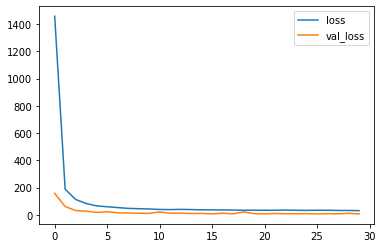

In [20]:
history_pd[['loss', 'val_loss']].plot.line()

Worst result in the training set

Function to show an original plot overlaid with predicted curve.

In [21]:
def plot_result(plot_number, x, y):
    plt.imshow(x[plot_number, :, :], cmap='gray_r', vmin=0, vmax=1, origin='lower')
    plt.plot(list(range(0, 201)), y[plot_number, :], color='red')
    plt.show()

In [22]:
y_train_pred = model.predict(X_train)

In [23]:
sq_diff_train = np.square(y_train_pred - y_train)

In [24]:
sq_diff_train = np.mean(sq_diff_train, 1)

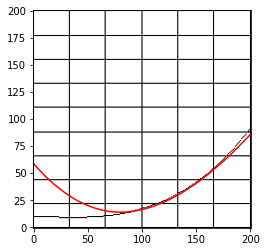

In [25]:
plot_result(np.argmax(sq_diff_train), X_train, y_train_pred)

In [26]:
sq_diff_train.max()

211.88912798638194

## Results on the test set

In [27]:
model.evaluate(X_test, y_test)
#print("Loss: ", loss)


63/63 [==============================] - 1s 19ms/step - loss: 8.4151


8.415066719055176

In [28]:
y_pred = model.predict(X_test)

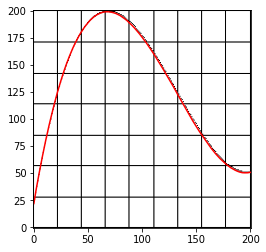

In [29]:
plot_result(0, X_test, y_pred)

Worst result in the test set

In [30]:
sq_diff = np.square(y_pred - y_test)

In [31]:
sq_diff = np.mean(sq_diff, 1)

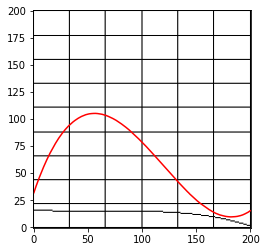

In [32]:
plot_result(np.argmax(sq_diff), X_test, y_pred)

In [33]:
sq_diff.max()

3191.20905880129